# LAB03- CÁC GIẢI THUẬT PHÂN CỤM CƠ BẢN

## 3.2 GIẢI THUẬT PHÂN CỤM ĐA CẤP

### 3.2.3 Bài tập thực hành 1  

#### (1) Import thư viện, cài đặt cấu hình, lấy và hiển thị dữ liệu
 - Import các thư viện cần thiết cho quá trình xử lý và trực quan hóa dữ liệu.
 - Đọc dữ liệu **chim cánh cụt** từ file `penguins.csv`.
 - Quan sát kích thước và một vài dòng đầu tiên của tập dữ liệu để nắm cấu trúc.  

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.style.use('seaborn-v0_8')
sns.set_theme(style='whitegrid', palette='muted')
penguins = pd.read_csv("C:/Users/Admin/Downloads/penguins.csv")

print("Kích thước dữ liệu:", penguins.shape)
display(penguins.head())

Kích thước dữ liệu: (344, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


**Nhận xét:**
 - Dữ liệu được nạp thành công, hiển thị đúng kích thước và cấu trúc.
 - Các cột đặc trưng và kiểu dữ liệu đã sẵn sàng cho quá trình xử lý tiếp theo.

#### (2) Tiền xử lý dữ liệu  
- Xử lý giá trị thiếu bằng **dropna()**
- Chuẩn hóa tên cột để dễ thao tác.
- Chọn các đặc trưng định lượng phục vụ phân cụm.
- Chuẩn hóa giá trị về thang [0, 1] bằng **MinMaxScaler**. 

In [26]:
penguins_clean = penguins.dropna()
penguins_clean.columns = penguins_clean.columns.str.strip().str.lower().str.replace(' ', '_')
X = penguins_clean[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Kích thước dữ liệu sau chuẩn hóa:", X_scaled.shape)

Kích thước dữ liệu sau chuẩn hóa: (335, 4)


**Nhận xét:**
 - 335: số lượng mẫu (cá thể chim cánh cụt) còn lại sau khi loại bỏ các dòng có giá trị thiếu.
 - 4: số lượng biến số được chọn để phân cụm


#### (3) Tính ma trận khoảng cách
- **Sử dụng phương pháp Ward** để đo mức độ tương đồng giữa các mẫu.  
- **Ward linkage** là phương pháp gộp cụm dựa trên tiêu chí tối thiểu hóa phương sai trong cụm (within-cluster variance).  
- Kết quả thu được là **ma trận liên kết (linkage matrix)** — đầu vào cho việc vẽ biểu đồ cây (*dendrogram*) và xác định số cụm tối ưu.


In [55]:
distances = linkage(X_scaled, method="ward")

print("Kích thước ma trận khoảng cách:", distances.shape)
print(distances[:10]) 

Kích thước ma trận khoảng cách: (334, 4)
[[6.80000000e+01 1.55000000e+02 7.28316120e-03 2.00000000e+00]
 [2.91000000e+02 2.97000000e+02 1.09247418e-02 2.00000000e+00]
 [4.30000000e+01 1.43000000e+02 1.19445626e-02 2.00000000e+00]
 [8.20000000e+01 1.27000000e+02 1.24721288e-02 2.00000000e+00]
 [2.05000000e+02 2.14000000e+02 1.38042082e-02 2.00000000e+00]
 [1.62000000e+02 2.00000000e+02 1.39559232e-02 2.00000000e+00]
 [2.60000000e+02 2.74000000e+02 1.39559232e-02 2.00000000e+00]
 [2.36000000e+02 2.46000000e+02 1.39760952e-02 2.00000000e+00]
 [2.64000000e+02 3.31000000e+02 1.39844606e-02 2.00000000e+00]
 [2.43000000e+02 2.73000000e+02 1.45663224e-02 2.00000000e+00]]


  **Nhận xét kết quả**
- Kích thước ma trận `(334, 4)` → dữ liệu có 335 mẫu, thực hiện 334 lần gộp cụm.  
- Các giá trị khoảng cách nhỏ (10⁻³ → 10⁻²) cho thấy các điểm ban đầu rất gần nhau.  
- Cột 4 = 2 trong 10 dòng đầu → các cụm đầu tiên chủ yếu là ghép từng cặp điểm đơn lẻ.  
- Khoảng cách tăng dần qua các bước → cụm càng lớn, độ khác biệt càng cao.  
- Kết quả hợp lý và sẵn sàng cho bước **vẽ dendrogram** để xác định số cụm tối ưu.

#### (4) Vẽ biểu đồ cây Dendrogram

 - Trực quan hóa quá trình gộp cụm trong phân cụm phân cấp `(Hierarchical Clustering)`.  
 - Sử dụng hàm `dendrogram()` của `scipy.cluster.hierarchy` với phương pháp **Ward**.  
 - Biểu đồ giúp quan sát mối quan hệ giữa các cụm và khoảng cách tại thời điểm gộp, từ đó xác định số cụm tối ưu.

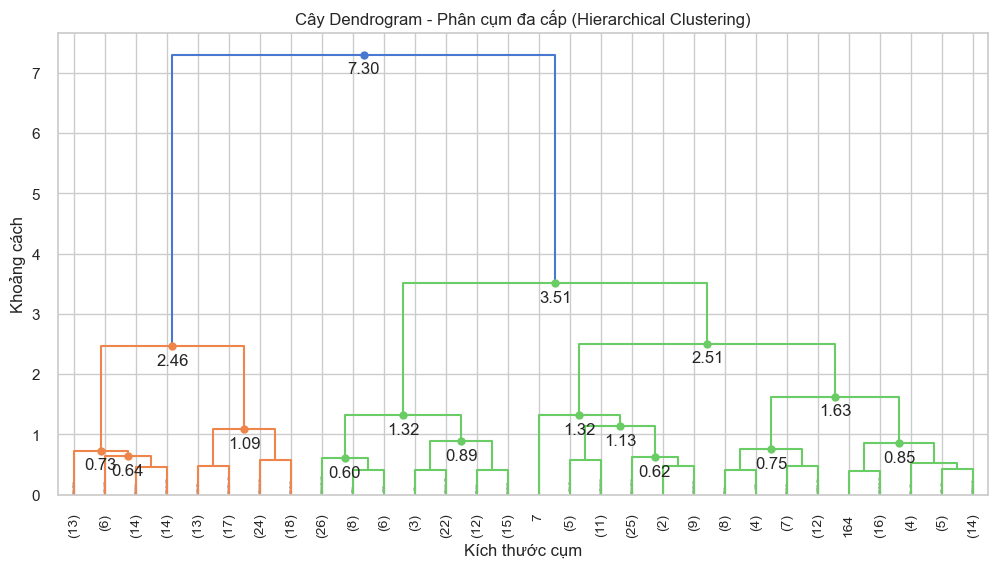

In [31]:
def annotated_dendrogram(*args, **kwargs):
    scipy_dendro = dendrogram(*args, truncate_mode='lastp',
                              show_contracted=True, leaf_rotation=90.)
    plt.title('Cây Dendrogram - Phân cụm đa cấp (Hierarchical Clustering)')
    plt.xlabel('Kích thước cụm')
    plt.ylabel('Khoảng cách')
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 0.6: 
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.2f" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points', va='top', ha='center')
    return scipy_dendro

plt.figure(figsize=(12, 6))
dn = annotated_dendrogram(distances)
plt.show()

**Nhận xét**

 - Biểu đồ dendrogram cho thấy các cụm bắt đầu hợp nhất ở **khoảng cách rất nhỏ (<1)**, chứng tỏ nhiều điểm dữ liệu có mức tương đồng cao. 
- Từ **khoảng cách ~2.5 đến 3.5**, ta thấy rõ **ba nhánh chính** tách biệt trước khi hợp nhất → đây là ngưỡng thích hợp để chia dữ liệu thành **3 cụm**.  
- Khi vượt quá **khoảng cách ~7.3**, toàn bộ dữ liệu mới hợp nhất thành một cụm duy nhất, xác nhận cấu trúc phân cấp rõ rệt.  
- Dựa trên biểu đồ này, bước tiếp theo sẽ **chọn số cụm k = 3** để tiến hành **gán nhãn cụm và phân tích đặc trưng từng nhóm**.

#### (5) Xác định và gán nhãn cụm

- Dựa vào biểu đồ Dendrogram, chọn **k = 3** là số cụm tối ưu.  
- Sử dụng hàm `fcluster()` để **gán nhãn cụm** cho từng mẫu dữ liệu dựa trên ma trận liên kết đã tính.  
- Thêm cột `Cluster` vào `penguins_clean` để lưu thông tin phân cụm của mỗi cá thể.


In [33]:
clusters = fcluster(distances, t=3, criterion="maxclust")
penguins_clean['Cluster'] = clusters
print("Số cụm được tạo:", penguins_clean['Cluster'].nunique())
print(penguins_clean['Cluster'].value_counts())

Số cụm được tạo: 3
Cluster
3    124
1    119
2     92
Name: count, dtype: int64


 **Nhận xét**
- Quy mô các cụm tương đối **cân bằng**, lần lượt gồm:
  - **Cụm 3:** 124 cá thể  
  - **Cụm 1:** 119 cá thể  
  - **Cụm 2:** 92 cá thể  
- Sự khác biệt về số lượng giữa các cụm cho thấy mỗi nhóm đại diện cho **một kiểu hình thái riêng biệt** của chim cánh cụt (ví dụ: khác nhau về khối lượng, chiều dài mỏ, hay sải cánh).  
- Ở bước tiếp theo, ta sẽ **trực quan hóa các cụm trên mặt phẳng đặc trưng** để quan sát rõ hơn sự phân tách giữa các nhóm.

#### (6) Trực quan hóa kết quả phân cụm

- Thể hiện trực quan cách các cụm được phân tách trong không gian dữ liệu.  
- Vẽ biểu đồ **scatter** giữa hai đặc trưng hình thái quan trọng:  
  - `culmen_length_mm` (chiều dài mỏ)  
  - `culmen_depth_mm` (độ sâu mỏ)  
- Các điểm dữ liệu được tô màu theo nhãn `Cluster` đã gán ở bước trước.

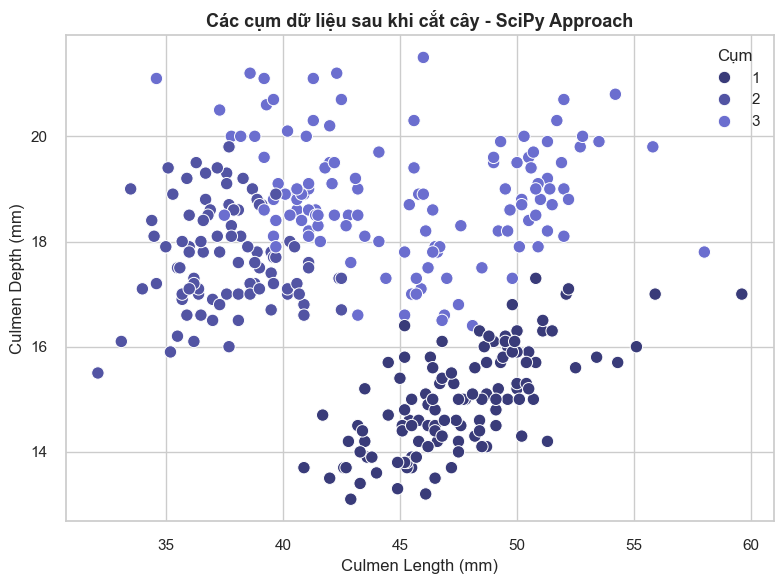

In [34]:
plt.figure(figsize=(8,6))
plt.title("Các cụm dữ liệu sau khi cắt cây - SciPy Approach", fontsize=13, weight='bold')
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='Cluster', 
                data=penguins_clean, palette='tab20b', s=80)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.legend(title="Cụm")
plt.tight_layout()
plt.show()

**Nhận xét**

- Biểu đồ thể hiện rõ sự **phân tách tương đối giữa ba cụm dữ liệu** theo hai đặc trưng hình thái: **chiều dài mỏ** và **độ sâu mỏ**.  
- **Cụm 1** (màu đậm nhất): tập trung chủ yếu ở vùng **mỏ dài hơn (45–55 mm)** và **độ sâu nhỏ (14–16 mm)**.  
- **Cụm 2**: có xu hướng **mỏ ngắn hơn (35–45 mm)** nhưng **độ sâu lớn hơn (17–20 mm)**.  
- **Cụm 3**: nằm xen giữa hai cụm còn lại, thể hiện **đặc trưng trung gian** về cả chiều dài và độ sâu mỏ.  
- Kết quả cho thấy **phân cụm phân cấp (Hierarchical Clustering)** đã chia dữ liệu thành các nhóm có **đặc trưng hình thái khác biệt rõ rệt**, phản ánh sự khác nhau về loài hoặc đặc điểm sinh học giữa các nhóm chim cánh cụt.

#### (7) So sánh các phương pháp liên kết (Linkage Methods)

- Đánh giá sự khác biệt trong kết quả phân cụm khi thay đổi phương pháp tính khoảng cách giữa các cụm.  
- Các phương pháp được so sánh gồm:
  - `centroid` – khoảng cách giữa trọng tâm của các cụm.  
  - `single` – khoảng cách nhỏ nhất giữa hai phần tử của hai cụm.  
  - `complete` – khoảng cách lớn nhất giữa hai phần tử của hai cụm.  
  - `average` – khoảng cách trung bình giữa tất cả các cặp phần tử.  
  - `weighted` – phương pháp trung bình có trọng số.  


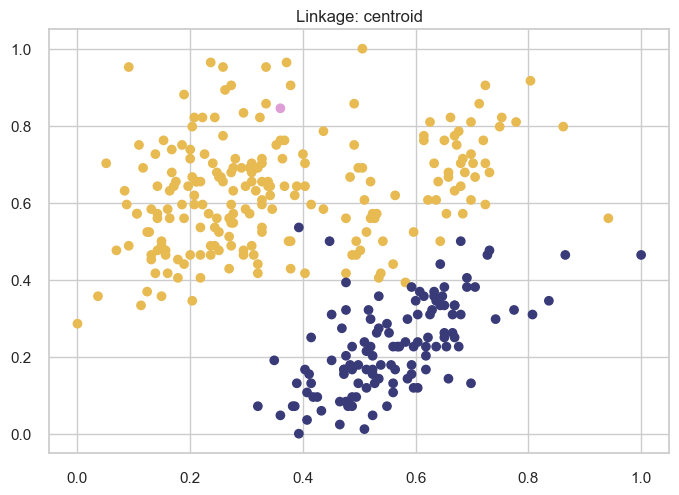

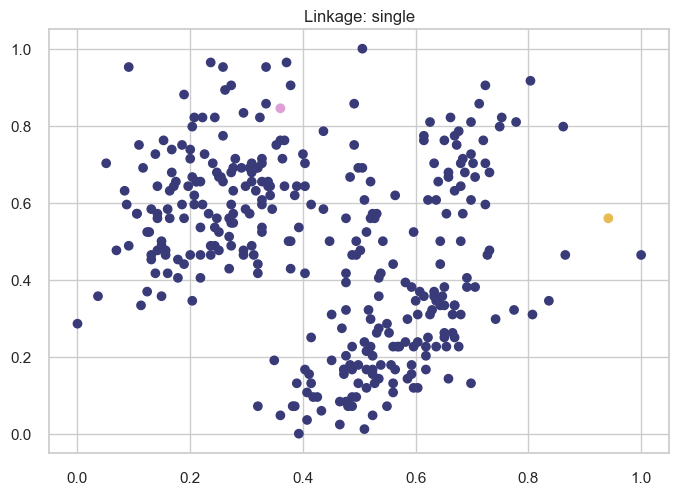

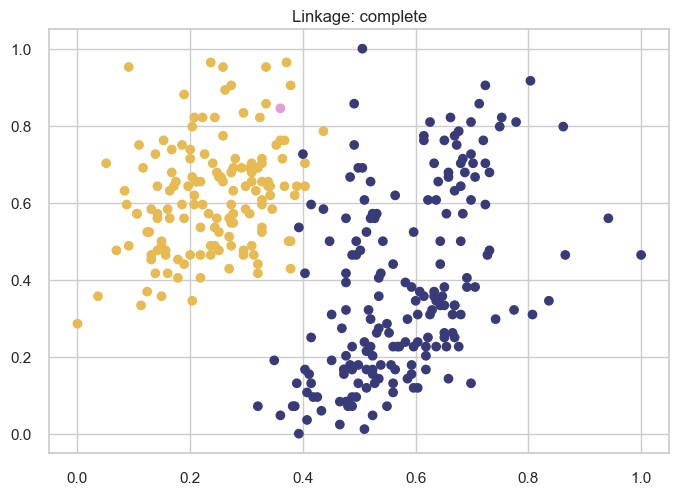

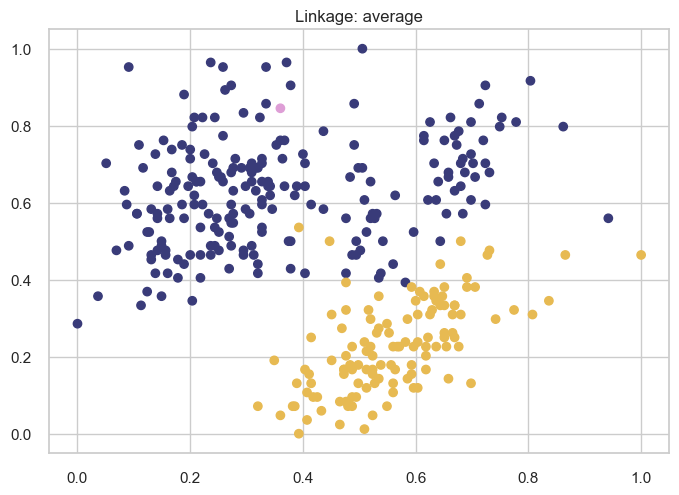

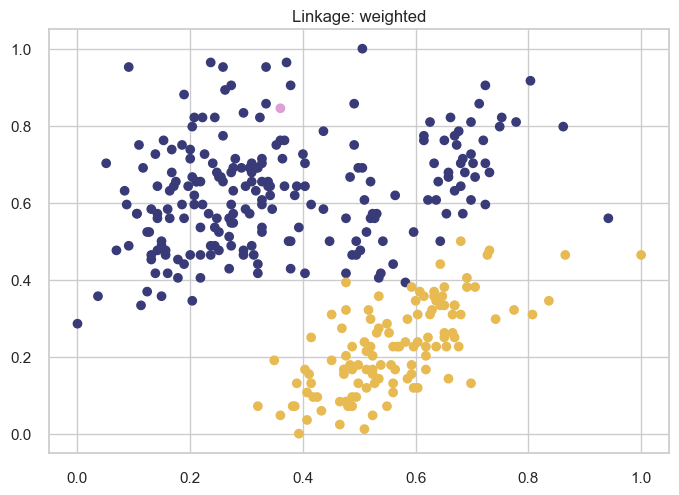

In [35]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']
for method in methods:
    distances = linkage(X_scaled, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="maxclust")
    plt.title('Linkage: ' + method)
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='tab20b')
    plt.show()

**Nhận xét tổng quan**

- Các phương pháp liên kết tạo ra kết quả phân cụm khác nhau, trong đó **Complete** và **Average linkage** cho **phân tách cụm rõ ràng và ổn định nhất**.  
- **Single linkage** kém hiệu quả do hiện tượng **nối chuỗi**, làm mờ ranh giới giữa các nhóm.  
- Nhìn chung, các phương pháp còn lại (Centroid, Weighted) cho kết quả trung gian, ranh giới cụm tương đối rõ.  
- Tổng thể, **Complete linkage** được đánh giá là phù hợp nhất cho dữ liệu chim cánh cụt do thể hiện **cấu trúc cụm chặt chẽ và rõ ràng**.

## (8) Phân cụm bằng Scikit-learn (Agglomerative Clustering)

- **Mục tiêu:** Thực hiện lại phân cụm phân cấp với thư viện `Scikit-learn` để so sánh với kết quả từ `SciPy`.  
- **Phương pháp:** Sử dụng `AgglomerativeClustering` với tham số:
  - `n_clusters = 3` → chia dữ liệu thành 3 cụm (theo kết quả Dendrogram trước đó).  
  - `linkage = "ward"` → cùng phương pháp đã dùng trong phân tích trước để đảm bảo tính nhất quán.


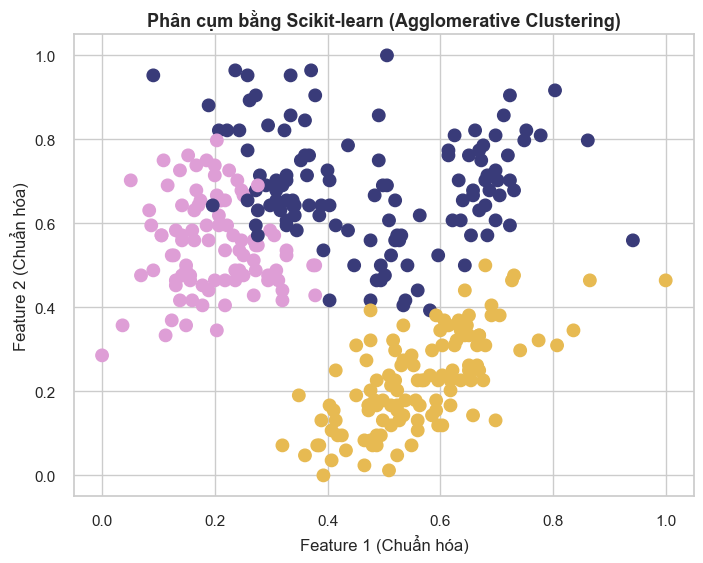

In [36]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, linkage="ward")
sklearn_clusters = ac.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.title("Phân cụm bằng Scikit-learn (Agglomerative Clustering)", fontsize=13, weight='bold')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=sklearn_clusters, cmap='tab20b', s=80)
plt.xlabel("Feature 1 (Chuẩn hóa)")
plt.ylabel("Feature 2 (Chuẩn hóa)")
plt.show()

**Nhận xét**

- Biểu đồ thể hiện rõ **ba cụm dữ liệu được phân tách khá tốt** trên mặt phẳng hai đặc trưng hình thái:  
  - **Feature 1:** Chiều dài mỏ (`culmen_length_mm`)  
  - **Feature 2:** Độ sâu mỏ (`culmen_depth_mm`)  
- **Cụm 1** (màu vàng): gồm các cá thể có **mỏ dài hơn nhưng nông hơn**, thể hiện nhóm chim có kích thước mỏ lớn.  
- **Cụm 2** (màu xanh đậm): đặc trưng bởi **mỏ ngắn hơn và sâu hơn**, đại diện cho nhóm chim có mỏ dày.  
- **Cụm 3** (màu hồng): nằm ở vùng trung gian, có **chiều dài và độ sâu mỏ trung bình** giữa hai nhóm còn lại.  
- Kết quả này **tương đồng với mô hình phân cụm Ward trong SciPy**, cho thấy **phương pháp Agglomerative Clustering của Scikit-learn** hoạt động **ổn định, phân tách cụm hợp lý** và phản ánh **sự khác biệt hình thái tự nhiên** giữa các cá thể chim cánh cụt.

### 3.2.4 Bài tập thực hành 2  

#### (1) Import thư viện, cài đặt cấu hình, lấy và hiển thị dữ liệu
 - Import các thư viện cần thiết cho quá trình xử lý và trực quan hóa dữ liệu.
 - Đọc dữ liệu **giao dịch hàng hóa online** từ file `OnlineRetail.csv`.
 - Quan sát kích thước và một vài dòng đầu tiên của tập dữ liệu để nắm cấu trúc.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
plt.style.use('seaborn-v0_8')
data = pd.read_csv("C:/Users/Admin/Downloads/OnlineRetail.csv/OnlineRetail.csv", encoding='ISO-8859-1')

print("Kích thước dữ liệu:", data.shape)
display(data.head())


Kích thước dữ liệu: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


- Dữ liệu gồm **541.909 giao dịch** và **8 biến**, thể hiện quy mô khá lớn.  
- Đây là bộ dữ liệu chi tiết về **giao dịch bán lẻ trực tuyến**, thích hợp cho việc **phân tích hành vi khách hàng và phân cụm theo giá trị mua hàng** trong các bước tiếp theo.

#### (2)Tiền xử lý dữ liệu

Mục tiêu của bước này là **loại bỏ các dữ liệu không hợp lệ** nhằm đảm bảo kết quả phân tích chính xác.  
Cụ thể:
- Bỏ các dòng thiếu `CustomerID` → vì không xác định được khách hàng nên **không thể nhóm hoặc phân cụm**.  
- Bỏ hóa đơn có mã bắt đầu bằng "C" → đây là **các hóa đơn hủy (Credit Note)**, nếu giữ lại sẽ **làm sai lệch doanh thu và tần suất mua hàng**.  
- Loại bỏ các dòng có `Quantity ≤ 0` hoặc `UnitPrice ≤ 0` → đây là **giao dịch lỗi hoặc ghi nhận giảm giá/hoàn trả**, không phản ánh hành vi mua thực tế.  
- Tạo thêm biến `TotalPrice = Quantity × UnitPrice` để **tính doanh thu từng giao dịch**, phục vụ phân tích RFM và giá trị khách hàng sau này.


In [39]:
data = data.dropna(subset=['CustomerID'])
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
print("Dữ liệu sau khi làm sạch:", data.shape)

Dữ liệu sau khi làm sạch: (397884, 9)


**Nhận xét**
- Sau khi làm sạch, bộ dữ liệu còn **397.884 giao dịch hợp lệ** với **9 biến** (tăng thêm biến `TotalPrice`).

#### (3) Tạo bảng RFM

Mục tiêu: **tính toán 3 chỉ số hành vi mua hàng của từng khách hàng** từ dữ liệu giao dịch đã làm sạch.

### Các bước thực hiện:
- **Chuyển cột `InvoiceDate` sang kiểu ngày–tháng** để có thể tính thời gian mua hàng.  
- **Tạo biến `TotalPrice` = `Quantity × UnitPrice`** nhằm biểu diễn **doanh thu mỗi giao dịch**.  
- **Làm sạch dữ liệu lần cuối**:  
  - Loại bỏ các bản ghi thiếu `CustomerID`.  
  - Loại bỏ hóa đơn hủy (mã bắt đầu bằng “C”).  
  - Chỉ giữ các giao dịch có `Quantity > 0` và `UnitPrice > 0`.  
- **Xác định `snapshot_date`** (ngày mua hàng gần nhất trong tập dữ liệu) → làm mốc tính **Recency**.  
- **Tổng hợp dữ liệu theo khách hàng (`CustomerID`)** để tạo bảng **RFM**:
  - `Recency`: số ngày kể từ lần mua gần nhất của khách hàng đến `snapshot_date`.  
  - `Frequency`: số hóa đơn khác nhau mà khách hàng đã mua.  
  - `Monetary`: tổng doanh thu mà khách hàng mang lại.


In [58]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce', dayfirst=True)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data = data.dropna(subset=['CustomerID'])
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
snapshot_date = data['InvoiceDate'].max()
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("Kích thước bảng RFM:", rfm.shape)
display(rfm.head())

Kích thước bảng RFM: (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


**Nhận xét:**

- Sau khi tổng hợp, bảng **RFM** có **4.338 khách hàng** với 3 chỉ số đặc trưng:  
  - **Recency**: số ngày kể từ lần mua gần nhất → ví dụ, khách hàng `12347` có `Recency = 1`, nghĩa là họ mới mua gần đây.  
  - **Frequency**: số lượng hóa đơn → khách hàng `12347` có `7` hóa đơn, cho thấy họ **mua hàng thường xuyên**.  
  - **Monetary**: tổng chi tiêu → khách hàng `12346` chi tới `77.183,6`, cho thấy **giá trị mua hàng rất cao**.  
- Nhìn chung, dữ liệu RFM cho thấy **sự đa dạng lớn giữa các khách hàng**: có người mua thường xuyên, có người mua ít nhưng giá trị cao.  
- Đây là **bước nền tảng** để tiến hành **phân cụm khách hàng theo giá trị và hành vi** trong các phần tiếp theo.

#### (4) Chuẩn hóa dữ liệu RFM

- Chuẩn hóa các biến **Recency**, **Frequency**, và **Monetary** để đưa về cùng thang đo [0,1].  
- Sử dụng **MinMaxScaler** nhằm đảm bảo các đặc trưng có mức độ ảnh hưởng tương đương trong quá trình phân cụm.  
- Kết quả thu được DataFrame `rfm_scaled_df` chứa dữ liệu đã chuẩn hóa, sẵn sàng cho bước phân cụm khách hàng.
python
Copy code


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
display(rfm_scaled_df.head())

,Recency,Frequency,Monetary
0,0.871314,0.000000,0.275443
1,0.002681,0.028846,0.015368
2,0.198391,0.014423,0.006401
3,0.048257,0.000000,0.006259
4,0.828418,0.000000,0.001180


 **Nhận xét:**
- Sau khi chuẩn hóa, các giá trị của **Recency**, **Frequency** và **Monetary** đều nằm trong khoảng **[0, 1]**, đảm bảo các biến có **thang đo đồng nhất**.  
- Những khách hàng có giá trị **Recency thấp** (gần 0) là **những người mua hàng gần đây**, trong khi giá trị cao (gần 1) thể hiện khách hàng đã **lâu không mua hàng**.  
- Hai biến **Frequency** và **Monetary** có nhiều giá trị nhỏ, cho thấy phần lớn khách hàng **mua hàng ít và giá trị thấp**, chỉ một nhóm nhỏ có mức mua sắm cao hơn.  
- Dữ liệu này hiện đã sẵn sàng để **phân cụm khách hàng theo mô hình RFM**.

#### (5) Phân cụm khách hàng bằng mô hình phân cụm đa cấp (Agglomerative Clustering)

- Áp dụng thuật toán **Agglomerative Clustering** (phân cụm thứ bậc từ dưới lên) để nhóm các khách hàng dựa trên ba đặc trưng **Recency**, **Frequency**, và **Monetary**.  
- Sử dụng phương pháp liên kết **average linkage** nhằm đo khoảng cách trung bình giữa các cụm.  
- Mô hình được thiết lập để chia khách hàng thành **4 cụm riêng biệt**, giúp nhận diện các nhóm hành vi tiêu dùng khác nhau.  
- Biểu đồ scatter bên dưới trực quan hóa kết quả phân cụm trên không gian hai chiều, thể hiện sự **phân tách rõ ràng giữa các nhóm khách hàng**.

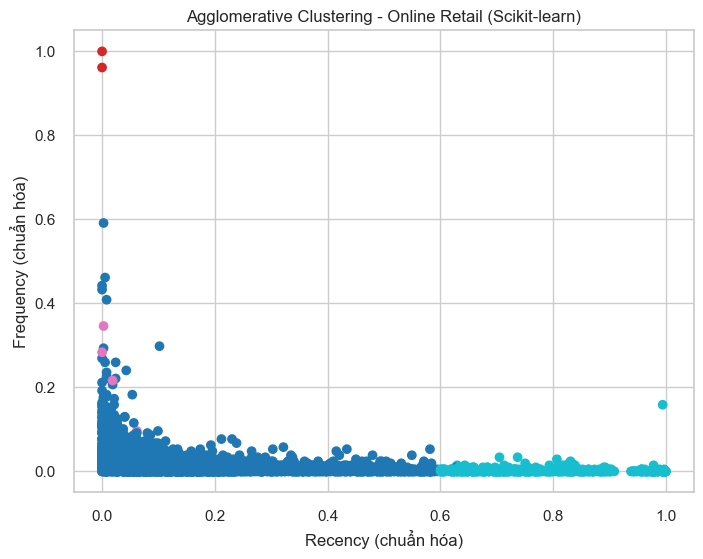

In [71]:
ac = AgglomerativeClustering(n_clusters=4, linkage='average')
ac_clusters = ac.fit_predict(rfm_scaled)
rfm['AgglomerativeCluster'] = ac.fit_predict(rfm_scaled)
plt.figure(figsize=(8,6))
plt.scatter(rfm_scaled[:,0], rfm_scaled[:,1], c=ac_clusters, cmap='tab10')
plt.title("Agglomerative Clustering - Online Retail (Scikit-learn)")
plt.xlabel("Recency (chuẩn hóa)")
plt.ylabel("Frequency (chuẩn hóa)")
plt.show()

**Nhận xét:**

- Mô hình **Agglomerative Clustering** với 4 cụm đã chia khách hàng thành các nhóm dựa trên hành vi mua hàng.  
- Phần lớn khách hàng tập trung ở vùng **Recency thấp – Frequency thấp**, cho thấy **đa số là khách hàng ít mua và không thường xuyên quay lại**.  
- Một số điểm ở góc trên bên trái (Recency thấp, Frequency cao) đại diện cho **nhóm khách hàng trung thành**, thường xuyên mua hàng trong thời gian gần đây.  
- Khu vực có **Recency cao** biểu thị nhóm **khách hàng lâu không giao dịch**, có thể cần chiến lược tiếp cận lại.  
- Nhìn chung, mô hình đã **phân tách rõ các nhóm hành vi tiêu dùng**, là cơ sở để xây dựng chiến lược marketing phù hợp cho từng nhóm khách hàng.

#### (6) Phân cụm khách hàng bằng mô hình K-Means

- Sử dụng thuật toán **K-Means Clustering** để phân nhóm khách hàng dựa trên ba chỉ tiêu **Recency**, **Frequency**, và **Monetary**.  
- Mô hình được thiết lập với **4 cụm (n_clusters = 4)** nhằm so sánh với kết quả từ mô hình phân cụm đa cấp trước đó.  
- Thuật toán K-Means phân chia khách hàng sao cho **khoảng cách trong cụm nhỏ nhất** và **khoảng cách giữa các cụm lớn nhất**.  
- Biểu đồ scatter bên dưới trực quan hóa kết quả phân cụm trên không gian hai chiều sau khi dữ liệu đã được chuẩn hóa.
python


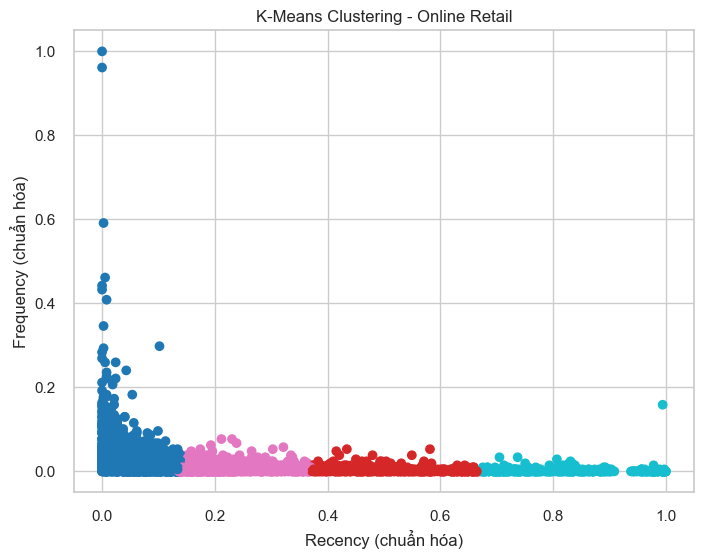

In [69]:
km = KMeans(n_clusters=4, random_state=42)
rfm['KMeansCluster'] = km.fit_predict(rfm_scaled)
plt.figure(figsize=(8,6))
plt.scatter(rfm_scaled[:,0], rfm_scaled[:,1], c=km_clusters, cmap='tab10')
plt.title("K-Means Clustering - Online Retail")
plt.xlabel("Recency (chuẩn hóa)")
plt.ylabel("Frequency (chuẩn hóa)")
plt.show()

**Nhận xét**
- Mô hình **K-Means Clustering** với 4 cụm đã chia khách hàng theo hành vi dựa trên **Recency** và **Frequency**.  
- Phần lớn khách hàng nằm ở vùng **Recency thấp – Frequency thấp**, thể hiện nhóm **ít mua và không quay lại thường xuyên**.  
- Một cụm nhỏ ở vùng **Recency thấp – Frequency cao** là **khách hàng trung thành**, thường xuyên mua hàng gần đây.  
- Khu vực **Recency cao** đại diện cho **khách hàng lâu không giao dịch**, cần được **tái tiếp cận**.  
- Nhìn chung, mô hình giúp **phân nhóm khách hàng tương đối rõ**, tuy còn **chồng lấn nhẹ** giữa các cụm, phù hợp với **Silhouette Score = 0.

#### (7) So sánh hai mô hình bằng chỉ số Silhouette

Chỉ số **Silhouette Score** được sử dụng để đánh giá mức độ tách biệt giữa các cụm:
- Giá trị càng gần **1** → cụm phân tách rõ ràng.  
- Giá trị gần **0** → các cụm chồng lấn.  
- Giá trị âm → điểm dữ liệu có thể bị gán sai cụm.

In [70]:
from sklearn.metrics import silhouette_score

silhouette_ac = silhouette_score(rfm_scaled, rfm['AgglomerativeCluster'])
silhouette_km = silhouette_score(rfm_scaled, rfm['KMeansCluster'])

print(f"Silhouette Score - Agglomerative Clustering: {silhouette_ac:.4f}")
print(f"Silhouette Score - K-Means Clustering: {silhouette_km:.4f}")

Silhouette Score - Agglomerative Clustering: 0.6784
Silhouette Score - K-Means Clustering: 0.5630


**Nhận xét**
    
Giá trị **Silhouette Score** của mô hình **Agglomerative Clustering** cao hơn `0.6784 > 0.5630`, cho thấy mô hình phân cụm đa cấp **đạt độ tách biệt giữa các cụm tốt hơn** so với K-Means.  
Điều này có nghĩa là các khách hàng trong cùng một cụm của mô hình Agglomerative có **đặc điểm RFM tương đồng hơn**, và **ranh giới giữa các cụm rõ ràng hơn**.  

Ngược lại, mô hình **K-Means Clustering** tuy vẫn cho kết quả khả quan, nhưng **các cụm có xu hướng chồng lấn nhẹ**, dẫn đến độ đồng nhất trong từng cụm thấp hơn.  

**Kết luận:** Trong trường hợp này, **Agglomerative Clustering** là mô hình phù hợp hơn để phân nhóm khách hàng theo tiêu chí RFM.